<a href="https://colab.research.google.com/github/ThuyLienNguyen/FDSS/blob/main/FDSS_Letter_Table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wget
import wget
import matplotlib.pyplot as plt
#wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/pendigits','pendigits')
#wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/pendigits.t','pendigits.t')


wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/letter.scale','letter.scale')
wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/letter.scale.t','letter.scale.t')

#wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/dna.scale','dna.scale')
#wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/dna.scale.t','dna.scale.t')

#wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/satimage.scale','satimage.scale')
#wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/satimage.scale.t','satimage.scale.t')



#wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/usps.bz2','usps.bz2')
#wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/usps.t.bz2','usps.t.bz2')













!bunzip2 usps.bz2
!bunzip2 usps.t.bz2

!pip install libsvm

import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split

from libsvm.svmutil import svm_read_problem
#y_train, X_train = svm_read_problem('usps')
#y_train, X_train = svm_read_problem('satimage.scale')
#y_train, X_train = svm_read_problem('pendigits')
y_train, X_train = svm_read_problem('letter.scale')
#y_train, X_train = svm_read_problem('dna.scale')


print(len(y_train))
print(len(X_train))

y_train =np.asarray(y_train, dtype=int)



from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
X_train = v.fit_transform(X_train)
#y_test, X_test = svm_read_problem('usps.t')
#y_test, X_test = svm_read_problem('satimage.scale.t')
#y_test, X_test = svm_read_problem('pendigits.t')
y_test, X_test = svm_read_problem('letter.scale.t')
#y_test, X_test = svm_read_problem('dna.scale.t')


X_test = v.transform(X_test)



from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

C = 0


import time
import numpy as np
from sklearn.metrics import accuracy_score
import numpy.linalg as la
import math


class MLogisticR:

  def __init__(self, W0, maxIter = 1000, maxTime = None, tol = None):

    self.W = W0
    self.maxIter = maxIter
    self.maxTime = maxTime
    self.tol = tol
    self.Time = [0]
    self.obj = []
    self.acc_train = []
    self.nnz = []


  def softmax(self, XW):
    exps = np.exp(XW)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

  def to_one_hot(self, y):
    K = y.max() + 1
    n = len(y)
    Y_one_hot = np.zeros((n, K))
    Y_one_hot[np.arange(n), y] = 1
    return Y_one_hot

  def soft_thresholding(self, v, gamma):
    return np.sign(v)*np.maximum(np.abs(v) - gamma,0)

  def logistic_smoothness(self, X):
    return 0.25 * np.max(la.eigvalsh(X.T @ X / X.shape[0]))+2*C




  def fit(self, X_train, y_train, eval = True, inertial = True):

    n, d = X_train.shape



    X_train = np.c_[np.ones((n, 1)), X_train]

    L= self.logistic_smoothness(X_train)




    y_train_one_hot = self.to_one_hot(y_train)

    XW = X_train.dot(self.W)

    prob = self.softmax(XW)
    y_train_one_hot = self.to_one_hot(y_train)




    f_val = -np.mean(np.sum(y_train_one_hot * np.log(prob + 1e-7), axis=1))
    self.obj.append(f_val + alpha*np.abs(self.W).sum()+C*np.linalg.norm(self.W)**2)


    y_pred = np.argmax(prob, axis=1)

    self.acc_train.append(accuracy_score(y_train,y_pred))


    XWp = XW
    Wp = self.W
    t = 1

    # prob = self.softmax(XW)

    for iter in range(self.maxIter):

      start_time = time.time()

      if inertial:
        tp = t
      else:
        tp = 1

      t = (1+np.sqrt(1+4*tp**2))/2
      beta = (tp-1)/t

      W_pp = (1 + beta)*self.W - beta*Wp


      XWpp = (1 + beta)*XW - beta*XWp

      prob = self.softmax(XWpp)

      Wp = self.W
      XWp = XW




      error = prob - y_train_one_hot

      g = 1/n * X_train.T.dot(error)

      self.W= self.soft_thresholding(W_pp - 1/L * g-2*C*1/L*self.W,1/L*alpha)



      #self.W = (1 + beta)*self.W - beta*Wp - self.eta * grad

      XW = X_train.dot(self.W)


      # prob = self.softmax(XW)

      self.Time.append(time.time() - start_time)
      if eval:
        prob = self.softmax(XW)

        f_val = -np.mean(np.sum(y_train_one_hot * np.log(prob + 1e-7), axis=1))
        self.obj.append(f_val + alpha*np.abs(self.W).sum()+C*np.linalg.norm(self.W)**2)


        y_pred = np.argmax(prob, axis=1)

        self.acc_train.append(accuracy_score(y_train,y_pred))




        #stopping conditions
        if self.maxTime is not None:
          if np.sum(self.Time) > self.maxTime:
            print('Stopped by MaxTime at ',iter,'-th iterattion')
            break


  def predict(self, X_test):
    n, d = X_test.shape
    X_test = np.c_[np.ones((n, 1)), X_test]
    prob = self.softmax(X_test.dot(self.W))

    y_pred = np.argmax(prob, axis=1)
    return y_pred



alpha = 0.001

class SFB:

  def __init__(self, w0,l=0.5, maxIter = 1000,  maxTime = None, tol = None, inertial = True):

    self.W = w0
    self.maxIter = maxIter
    self.l = l
    self.maxTime = maxTime
    self.tol = tol
    self.Time = [0]
    self.obj = []
    self.acc_train = []
    self.nnz = []
    self.inertial = inertial


  def soft_thresholding(self, v, gamma):
    return np.sign(v)*np.maximum(np.abs(v) - gamma,0)


  def softmax(self, XW):
    exps = np.exp(XW)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums



  def to_one_hot(self, y):
    K = y.max() + 1
    n = len(y)
    Y_one_hot = np.zeros((n, K))
    Y_one_hot[np.arange(n), y] = 1
    return Y_one_hot


  def logistic_smoothness(self, X):
    return 0.25 * np.max(la.eigvalsh(X.T @ X / X.shape[0]))+2*C



  def logistic_strong(self, X):
    return  0.25*np.min(la.eigvalsh(X.T @ X / X.shape[0]))+2*C



  def fit(self, X_train, y_train, eval = True, inertial = True):

    n, d = X_train.shape

    #L_0= self.logistic_smoothness(X_train)+self.r
    #print('L_0',L_0)


    X_train = np.c_[np.ones((n, 1)), X_train]


    L = self.logistic_smoothness(X_train)
    print('L',L)

    mu= self.logistic_strong(X_train)

    print('mu',mu)

    XW = X_train.dot(self.W)


    nu=99/100*2/(L+mu)
    le = self.l
    #al=50



    #print('2*la*al**2 - ga*c2:=',2*la*al**2 - ga*c2)
    t = 1
    Wp = self.W
    XWp = XW
    prob = self.softmax(XW)
    y_train_one_hot = self.to_one_hot(y_train)




    f_val = -np.mean(np.sum(y_train_one_hot * np.log(prob + 1e-7), axis=1))
    self.obj.append(f_val + alpha*np.abs(self.W).sum()+C*np.linalg.norm(self.W)**2)


    y_pred = np.argmax(prob, axis=1)

    self.acc_train.append(accuracy_score(y_train,y_pred))

    i=0

    #L= 1/n*self.logistic_smoothness(X_train)+self.r


    k=1
    beta = 1/(1 + 3**(1/2))

    for iter in range(self.maxIter):
      i=i+1
      start_time = time.time()



      prob = self.softmax(XW)


      error = prob - y_train_one_hot

      g = 1/n * X_train.T.dot(error)


      pr= self.soft_thresholding(self.W - nu * g-2*C*nu*self.W,nu*alpha)
      grad_norm = np.linalg.norm(self.W-pr)


      Wp = self.W
      self.W = (1+beta)*self.W - beta*Wp - beta*(self.W - pr)



      XW = X_train.dot(self.W)
      self.Time.append(time.time() - start_time)
      if eval:
        prob = self.softmax(XW)
        f_val = -np.mean(np.sum(y_train_one_hot * np.log(prob + 1e-7), axis=1))
        self.obj.append(f_val + alpha*np.abs(self.W).sum()+C*np.linalg.norm(self.W)**2)


        y_pred = np.argmax(prob, axis=1)

        self.acc_train.append(accuracy_score(y_train,y_pred))



        #stopping conditions
        if self.maxTime is not None:
          if np.sum(self.Time) > self.maxTime:
            print('Stopped by MaxTime at ',iter,'-th iterattion')
            break
        #if self.tol is not None:
        #  if np.abs(self.obj[-1] - self.obj[-2]) <= self.tol:
        #    print('Stopped by the objective value at ',iter,'-th iterattion')
        #    break

  def predict(self, X_test):
    n, d = X_test.shape
    X_test = np.c_[np.ones((n, 1)), X_test]
    prob = self.softmax(X_test.dot(self.W))

    y_pred = np.argmax(prob, axis=1)
    return y_pred







  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=932dd7dc9bc4008a353bbeddfc6510de32c345cdb25f3985facf5a2c12399ed3
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget
bunzip2: Can't open input file usps.bz2: No such file or directory.
bunzip2: Can't open input file usps.t.bz2: No such file or directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp312-cp312-linux_x86_64.whl size=251417 sha256=71509d7d359435f97277cded765c77f04a3fc06c805dbc83fa7eab0eb355dc57
  Stored in directory: /root/.cache/pip/wheels/3e/41/29/219cda9dd4f382777661816e4b9215c10ffe5d07dad2bc9401
Successfully built libsvm
15000
15000


In [ ]:

alpha = 0.001
from collections import abc
import time
import numpy as np
import math
from sklearn.metrics import accuracy_score


class M2:

  def __init__(self, w0, l=0.003, p=0.4, q=0.5,h1=10,h2=5,  maxIter = 1000,  maxTime = 5, inertial = True):

    self.W = w0
    self.maxIter = maxIter
    self.l = l
    self.p = p
    self.q = q
    self.h1=h1
    self.h2=h2
    self.maxTime = maxTime
    self.Time = [0]
    self.obj = []
    self.acc_train = []
    self.nnz = []
    self.inertial = inertial


  def soft_thresholding(self, v, gamma):
    return np.sign(v)*np.maximum(np.abs(v) - gamma,0)


  def softmax(self, XW):
    exps = np.exp(XW)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums



  def to_one_hot(self, y):
    K = y.max() + 1
    n = len(y)
    Y_one_hot = np.zeros((n, K))
    Y_one_hot[np.arange(n), y] = 1
    return Y_one_hot


  def logistic_smoothness(self, X):
    return 0.25 * np.max(la.eigvalsh(X.T @ X / X.shape[0]))+2*C



  def logistic_strong(self, X):
    return  0.25*np.min(la.eigvalsh(X.T @ X / X.shape[0]))+2*C



  def fit(self, X_train, y_train, eval = True, inertial = True):

    n, d = X_train.shape

    #L_0= self.logistic_smoothness(X_train)+self.r
    #print('L_0',L_0)


    X_train = np.c_[np.ones((n, 1)), X_train]


    L = self.logistic_smoothness(X_train)
    print('L',L)

    mu= self.logistic_strong(X_train)

    print('mu',mu)

    XW = X_train.dot(self.W)

    #grad0 = gradient(self.w)
    v = np.zeros_like(self.W)


    #la=0.2
    la = 0.001

    #le = 0.005

    i=0
    a=10

    k=0
    m=0
    #ga=400
    ga=1

    nu=99/100*2/(L+mu)

    print('nu',nu)
    c=1-nu*mu

    print('c',c)
    alpha =0.001
    c_3= 1 + c**2/(1-c**2) +(2*c**2/(1-c**2)**(1/2))
    c_4= 1 +(3*c**2/(1-c**2))
    la1=0.2

    al =(1/la1*min(max(c_3, c_4), ((3+c**2)/(2*la1*(1-c**2))))**(1/2)) +1

    al=10


    print('al',al)


    #p=2/3
    #q=-2/3


    t = 1
    Wp = self.W
    XWp = XW
    prob = self.softmax(XW)
    y_train_one_hot = self.to_one_hot(y_train)




    f_val = -np.mean(np.sum(y_train_one_hot * np.log(prob + 1e-7), axis=1))
    self.obj.append(f_val + alpha*np.abs(self.W).sum()+C*np.linalg.norm(self.W)**2)


    y_pred = np.argmax(prob, axis=1)

    self.acc_train.append(accuracy_score(y_train,y_pred))

    i=0






    for iter in range(self.maxIter):
      i=i+1
      start_time = time.time()



      prob = self.softmax(XW)


      error = prob - y_train_one_hot

      g = 1/n * X_train.T.dot(error)

      pr= self.soft_thresholding(self.W - nu * g-2*C*nu*self.W,nu*alpha)
      grad_norm = np.linalg.norm(self.W-pr)


      Wp = self.W
      grad_normv= np.linalg.norm(self.W-pr-al*v)


      if grad_norm >=a* grad_normv:
            v = v+self.l*la*(self.W-pr-al*v)*(self.h1/((i*self.l)**k*(grad_norm)**(self.p)) + self.h2/((grad_norm**(self.q))))#+le*5*(grad-al/(i*le)*v)
            self.W= Wp-ga*self.l*v*(self.h1/((i*self.l)**k*(grad_norm)**(self.p)) + self.h2/((grad_norm**(self.q))))#-ga*self.l*v*50#-ga*self.l*v*50
      else:
            v = v+self.l*la*(self.W-pr-al*v)*(self.h1/((self.l*i)**k*(a*np.linalg.norm(self.W-pr-al*v))**(self.p)) +self.h2/((a*np.linalg.norm(self.W-pr-al*v))**(self.q)))#+le*5*(grad-al/(i*le)*v)
            self.W= Wp-ga*self.l*v*(self.h1/((self.l*i)**k*(a*np.linalg.norm(self.W-pr-al*v))**(self.p)) +self.h2/((a*np.linalg.norm(self.W-pr-al*v))**(self.q)))#-ga*self.l*v*50#-ga*self.l*v*50

      XW = X_train.dot(self.W)
      self.Time.append(time.time() - start_time)
      if eval:
        prob = self.softmax(XW)
        f_val = -np.mean(np.sum(y_train_one_hot * np.log(prob + 1e-7), axis=1))
        self.obj.append(f_val + alpha*np.abs(self.W).sum()+C*np.linalg.norm(self.W)**2)


        y_pred = np.argmax(prob, axis=1)

        self.acc_train.append(accuracy_score(y_train,y_pred))



        #stopping conditions
        if self.maxTime is not None:
          if np.sum(self.Time) > self.maxTime:
            print('Stopped by MaxTime at ',iter,'-th iterattion')
            break


  def predict(self, X_test):
    n, d = X_test.shape
    X_test = np.c_[np.ones((n, 1)), X_test]
    prob = self.softmax(X_test.dot(self.W))

    y_pred = np.argmax(prob, axis=1)
    return y_pred


In [ ]:

alpha = 0.001
from collections import abc
import time
import numpy as np
import math
from sklearn.metrics import accuracy_score
class M2_0:
  def __init__(self, w0, l=0.01, p=2/3, q=-2/3,h1=10,h2=5,  maxIter = 1000,  maxTime = None, tol = None, inertial = True):

    self.W = w0
    self.maxIter = maxIter
    self.l = l
    self.p = p
    self.q = q
    self.h1=h1
    self.h2=h2
    self.maxTime = maxTime
    self.tol = tol
    self.Time = [0]
    self.obj = []
    self.acc_train = []
    self.nnz = []
    self.inertial = inertial

  def soft_thresholding(self, v, gamma):
    return np.sign(v)*np.maximum(np.abs(v) - gamma,0)


  def softmax(self, XW):
    exps = np.exp(XW)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums



  def to_one_hot(self, y):
    K = y.max() + 1
    n = len(y)
    Y_one_hot = np.zeros((n, K))
    Y_one_hot[np.arange(n), y] = 1
    return Y_one_hot


  def logistic_smoothness(self, X):
    return 0.25 * np.max(la.eigvalsh(X.T @ X / X.shape[0]))+2*C



  def logistic_strong(self, X):
    return  0.25*np.min(la.eigvalsh(X.T @ X / X.shape[0]))+2*C



  def fit(self, X_train, y_train, eval = True, inertial = True):

    n, d = X_train.shape




    X_train = np.c_[np.ones((n, 1)), X_train]


    L = self.logistic_smoothness(X_train)
    print('L',L)

    mu= self.logistic_strong(X_train)

    print('mu',mu)

    XW = X_train.dot(self.W)


    v = np.zeros_like(self.W)


    la=0.1

    #le = 0.01

    i=0
    a=10


    k=0
    m=0
    ga=1
    alpha = 0.001

    nu=1/10*2/(L+mu)

    print('nu',nu)
    c=1-nu*mu

    print('c',c)


    al=1

    print('al',al)
    #al=50

    #p=2/3
    #q=-2/3

    t = 1
    Wp = self.W
    XWp = XW
    prob = self.softmax(XW)
    y_train_one_hot = self.to_one_hot(y_train)




    f_val = -np.mean(np.sum(y_train_one_hot * np.log(prob + 1e-7), axis=1))
    self.obj.append(f_val + alpha*np.abs(self.W).sum()+C*np.linalg.norm(self.W)**2)


    y_pred = np.argmax(prob, axis=1)

    self.acc_train.append(accuracy_score(y_train,y_pred))

    i=0
    be=5




    for iter in range(self.maxIter):
      i=i+1
      start_time = time.time()



      prob = self.softmax(XW)


      error = prob - y_train_one_hot

      g = 1/n * X_train.T.dot(error)

      pr= self.soft_thresholding(self.W - nu * g-2*C*nu*self.W,nu*alpha)
      grad_norm1 = np.linalg.norm(self.W-pr)


      Wp = self.W
      grad2= self.W-pr-al*v
      grad_norm2 = np.linalg.norm(grad2)
      pr2= self.soft_thresholding(self.W -al*v- nu * g-2*C*nu*(self.W - al*v),nu*alpha)
      grad3 = self.W-pr2-al*v
      grad_norm3 = np.linalg.norm(grad3)
      #grad_norm = a*max(grad_norm1, grad_norm2, grad_norm3)
      grad_norm = a*max(grad_norm1, grad_norm2)






      v = v+self.l*(la*grad2+be*grad3)*(100+self.h1/((i*self.l)**k*(grad_norm)**(self.p)) + self.h2/((grad_norm**(self.q))))#+le*5*(grad-al/(i*le)*v)
      self.W= Wp-ga*self.l*v*(100+self.h1/((i*self.l)**k*(grad_norm)**(self.p)) + self.h2/((grad_norm**(self.q))))


      XW = X_train.dot(self.W)
      self.Time.append(time.time() - start_time)
      if eval:
        prob = self.softmax(XW)
        f_val = -np.mean(np.sum(y_train_one_hot * np.log(prob + 1e-7), axis=1))
        self.obj.append(f_val + alpha*np.abs(self.W).sum()+C*np.linalg.norm(self.W)**2)


        y_pred = np.argmax(prob, axis=1)

        self.acc_train.append(accuracy_score(y_train,y_pred))



        #stopping conditions
        if self.maxTime is not None:
          if np.sum(self.Time) > self.maxTime:
            print('Stopped by MaxTime at ',iter,'-th iterattion')
            break


  def predict(self, X_test):
    n, d = X_test.shape
    X_test = np.c_[np.ones((n, 1)), X_test]
    prob = self.softmax(X_test.dot(self.W))

    y_pred = np.argmax(prob, axis=1)
    return y_pred


In [ ]:
np.random.seed(42)
d = X_train.shape[1]
K = len(np.unique(y_train))

W0 = np.random.randn(d+1, K+1)
#W0 = np.random.randn(d+1, K)


#MLR = MLogisticR(W0,eta =0.1, maxIter=40,alpha=0.001, maxTime=5)
#print(W0)

In [ ]:
import time

start_time = time.time()

#M2_M=M2(W0.copy(),l=0.005, p=2/3, q=-2/3, h1=10, h2=5, maxIter = 30, maxTime=None)
M2_M=M2(W0.copy(),l=0.9, p=1/3, q=-2/3, h1=50, h2=10, maxIter = 30, maxTime=None)
M2_M.fit(X_train,y_train)
print(time.time() -start_time)


print(accuracy_score(y_test, M2_M.predict(X_test)))
print(M2_M.acc_train[-1])

L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
3.524338722229004
0.7442
0.7507333333333334


In [ ]:
start_time = time.time()
M2_0M=M2_0(W0.copy(), l=0.01, p=1/3, q=-2/3,h1=100,h2=20, maxIter = 30, maxTime = None)
M2_0M.fit(X_train,y_train)
print(time.time() -start_time)

print(accuracy_score(y_test,M2_0M.predict(X_test)))
print(M2_0M.acc_train[-1])

L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
2.3596768379211426
0.7556
0.7604


In [ ]:


start_time = time.time()
MLR = MLogisticR(W0.copy(), maxIter=30, maxTime=None)
MLR.fit(X_train,y_train)
print(time.time() -start_time)

print(accuracy_score(y_test,MLR.predict(X_test)))
print(MLR.acc_train[-1])

5.706003427505493
0.7044
0.7034666666666667


In [ ]:
start_time = time.time()
SFB_M=SFB(W0.copy(), l=0.3,maxIter=30, maxTime=None)
SFB_M.fit(X_train,y_train)
print(time.time() -start_time)
print(accuracy_score(y_test,SFB_M.predict(X_test)))
print(SFB_M.acc_train[-1])

L 1.0771584594599872
mu 0.018485104270222305
6.890779733657837
0.2634
0.267


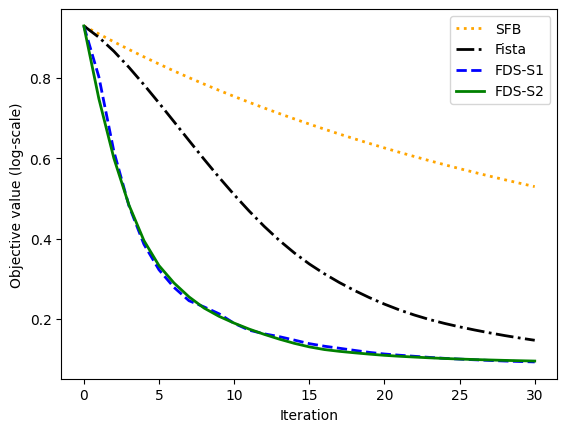

In [ ]:



plt.plot(range(len(SFB_M.obj)), np.log10(SFB_M.obj),  color='orange', markersize=2, linewidth =2, linestyle=':',label='SFB')


plt.plot(range(len(MLR.obj)), np.log10(MLR.obj),  color='black', markersize=2, linewidth =2, linestyle='-.',label='Fista')

plt.plot(range(len(M2_0M.obj)), np.log10(M2_0M.obj),  color='blue', markersize=2, linewidth =2, linestyle='--',label='FDS-S1')
plt.plot(range(len(M2_M.obj)), np.log10(M2_M.obj),  color='green', markersize=2, linewidth =2, linestyle='-',label='FDS-S2')


plt.xlabel('Iteration')
plt.ylabel('Objective value (log-scale)')


plt.legend()

In [ ]:
import pandas as pd
import time
import numpy as np
from sklearn.metrics import accuracy_score

# --- Configuration ---
num_runs = 10  # number of repetitions for averaging
results = []  # to store results for each model/run

# --- Helper to evaluate a model ---
def run_and_record(model_name, model_class, init_args, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model = model_class(**init_args)
    model.fit(X_train, y_train)
    runtime = time.time() - start_time

    # final loss = last entry of obj if present
    final_loss = model.obj[-1] if hasattr(model, "obj") and len(model.obj) > 0 else np.nan

    # iterations = len(obj)-1 because obj is appended each iteration
    iterations = len(model.obj) if hasattr(model, "obj") else np.nan

    acc_test = accuracy_score(y_test, model.predict(X_test))
    acc_train = model.acc_train[-1] if hasattr(model, "acc_train") and len(model.acc_train) > 0 else np.nan

    return {
        "Model": model_name,
        "Final Loss": final_loss,
        "Test Accuracy": acc_test,
        "Train Accuracy": acc_train,
        "Runtime (s)": runtime,
        "Iterations": iterations
    }
np.random.seed(42)
# --- Run experiments ---
for r in range(num_runs):
    print(f"\n=== Run {r+1}/{num_runs} ===")

    # You may need to reinit W0 each time to keep runs consistent
    W0 = np.random.randn(X_train.shape[1]+1, len(np.unique(y_train))+1)

    results.append(run_and_record(
        "M2", M2,
        dict(w0=W0.copy(), l=0.9, p=1/3, q=-2/3, h1=50, h2=10, maxIter=30),
        X_train, y_train, X_test, y_test
    ))

    results.append(run_and_record(
        "M2_0", M2_0,
        dict(w0=W0.copy(), l=0.01, p=1/3, q=-2/3, h1=100, h2=20, maxIter=30),
        X_train, y_train, X_test, y_test
    ))

    results.append(run_and_record(
        "MLogisticR", MLogisticR,
        dict(W0=W0.copy(), maxIter=30),
        X_train, y_train, X_test, y_test
    ))

    results.append(run_and_record(
        "SFB", SFB,
        dict(w0=W0.copy(), l=0.3, maxIter=30),
        X_train, y_train, X_test, y_test
    ))

# --- Create summary DataFrame ---
df = pd.DataFrame(results)

# Compute averages by model
summary = df.groupby("Model").agg({
    "Final Loss": "mean",
    "Test Accuracy": "mean",
    "Train Accuracy": "mean",
    "Runtime (s)": "mean",
    "Iterations": "mean"
}).reset_index()

print("\n=== Detailed Results (all runs) ===")
print(df.to_string(index=False))

print("\n=== Summary (averaged across runs) ===")
print(summary.to_string(index=False))


=== Run 1/10 ===
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
L 1.0771584594599872
mu 0.018485104270222305

=== Run 2/10 ===
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
L 1.0771584594599872
mu 0.018485104270222305

=== Run 3/10 ===
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
L 1.0771584594599872
mu 0.018485104270222305

=== Run 4/10 ===
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
L 1.0771584594599872
mu 0.018485104270222305


L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
p=1/3, q=-2/3: Test Accuracy = 0.6312, Train Accuracy = 0.6372
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
p=1/3, q=-1/3: Test Accuracy = 0.6072, Train Accuracy = 0.6123333333333333
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
p=1/3, q=-1/2: Test Accuracy = 0.62, Train Accuracy = 0.6268
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
p=1/2, q=-2/3: Test Accuracy = 0.6178, Train Accuracy = 0.6253333333333333
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
p=1/2, q=-1/3: Test Accuracy = 0.5722, Train Accuracy = 0.5771333333333334
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
p=1/2, q=-1/2: Test Accuracy = 0.5994, Train Accuracy = 0.6030666666666666
L 1.07715845945998

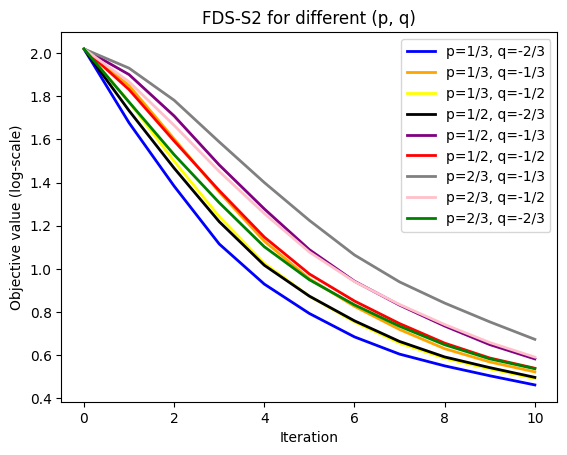

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Define (p, q) pairs and corresponding labels
pq_pairs = [
    (1/3, -2/3, 'p=1/3, q=-2/3', 'blue'),
    (1/3, -1/3, 'p=1/3, q=-1/3', 'orange'),
    (1/3, -1/2, 'p=1/3, q=-1/2', 'yellow'),
    (1/2, -2/3, 'p=1/2, q=-2/3', 'black'),
    (1/2, -1/3, 'p=1/2, q=-1/3', 'purple'),
    (1/2, -1/2, 'p=1/2, q=-1/2', 'red'),
    (2/3, -1/3, 'p=2/3, q=-1/3', 'grey'),
    (2/3, -1/2, 'p=2/3, q=-1/2', 'pink'),
    (2/3, -2/3, 'p=2/3, q=-2/3', 'green')
]

# Store models and results
models3 = []


# Common model parameters
params = {'l': 0.9, 'h1': 50, 'h2': 10, 'maxIter': 10, 'maxTime': None}

# Train and evaluate models
for p, q, label, color in pq_pairs:
    model3 = M2(W0.copy(), p=p, q=q, **params)
    model3.fit(X_train, y_train)
    test_acc3 = accuracy_score(y_test, model3.predict(X_test))
    train_acc3 = model3.acc_train[-1]
    print(f"{label}: Test Accuracy = {test_acc3}, Train Accuracy = {train_acc3}")
    models3.append((model3, label, color))

# Plot all models in one figure
plt.clf()
#plt.figure(figsize=(10, 6))

for model3, label, color in models3:
    iterations = range(len(model3.obj))  # Use iteration index as x-axis
    obj_log = np.log(model3.obj)  # Log of objective values
    plt.plot(iterations, obj_log, color=color, linewidth=2, linestyle='-', label=label)
plt.xlabel('Iteration')
plt.ylabel('Objective value (log-scale)')
plt.title('FDS-S2 for different (p, q)')
plt.legend()
#plt.grid(True)
plt.show()


L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
p=1/3, q=-2/3: Test Accuracy = 0.7182, Train Accuracy = 0.7196
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
p=1/3, q=-1/3: Test Accuracy = 0.7006, Train Accuracy = 0.707
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
p=1/3, q=-1/2: Test Accuracy = 0.7084, Train Accuracy = 0.7141333333333333
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
p=1/2, q=-2/3: Test Accuracy = 0.7006, Train Accuracy = 0.7078666666666666
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
p=1/2, q=-1/3: Test Accuracy = 0.678, Train Accuracy = 0.6794666666666667
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
p=1/2, q=-1/2: Test Accuracy = 0.6906, Train Accuracy = 0.6922666666666667
L 1.07715845

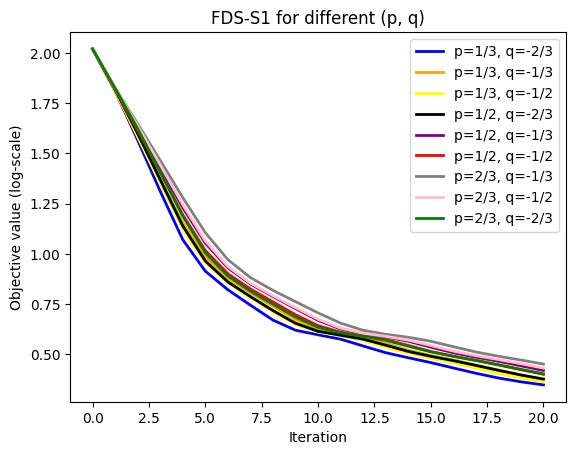

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Define (p, q) pairs and corresponding labels
pq_pairs = [
    (1/3, -2/3, 'p=1/3, q=-2/3', 'blue'),
    (1/3, -1/3, 'p=1/3, q=-1/3', 'orange'),
    (1/3, -1/2, 'p=1/3, q=-1/2', 'yellow'),
    (1/2, -2/3, 'p=1/2, q=-2/3', 'black'),
    (1/2, -1/3, 'p=1/2, q=-1/3', 'purple'),
    (1/2, -1/2, 'p=1/2, q=-1/2', 'red'),
    (2/3, -1/3, 'p=2/3, q=-1/3', 'grey'),
    (2/3, -1/2, 'p=2/3, q=-1/2', 'pink'),
    (2/3, -2/3, 'p=2/3, q=-2/3', 'green')
]

# Store models and results
models4 = []

# Common model parameters
params = {'l': 0.01, 'h1': 100, 'h2': 5, 'maxIter': 20, 'maxTime': None}

# Train and evaluate models
for p, q, label, color in pq_pairs:
    model4 = M2_0(W0.copy(), p=p, q=q, **params)
    model4.fit(X_train, y_train)
    test_acc4 = accuracy_score(y_test, model4.predict(X_test))
    train_acc4 = model4.acc_train[-1]
    print(f"{label}: Test Accuracy = {test_acc4}, Train Accuracy = {train_acc4}")
    models4.append((model4, label, color))


# Plot all models in one figure
plt.clf()
#plt.figure(figsize=(10, 6))
for model4, label, color in models4:
    iterations = range(len(model4.obj))  # Use iteration index as x-axis
    plt.plot(iterations, np.log(model4.obj), color=color, linewidth=2, linestyle='-', label=label)
plt.xlabel('Iteration')
plt.ylabel('Objective value (log-scale)')
plt.title('FDS-S1 for different (p, q)')
plt.legend()
#plt.grid(True)
plt.show()











In [ ]:
M2_2=M2(W0.copy(),l=0.1, p=1/3, q=-2/3, h1=50, h2=10, maxIter = 30,maxTime=None)
M2_2.fit(X_train,y_train)




M2_1=M2(W0.copy(),l=0.5, p=1/3, q=-2/3, h1=50, h2=10, maxIter = 30,maxTime=None)
M2_1.fit(X_train,y_train)


M2_M=M2(W0.copy(),l=0.9, p=1/3, q=-2/3, h1=50, h2=10, maxIter = 30,maxTime=None)
M2_M.fit(X_train,y_train)



L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10


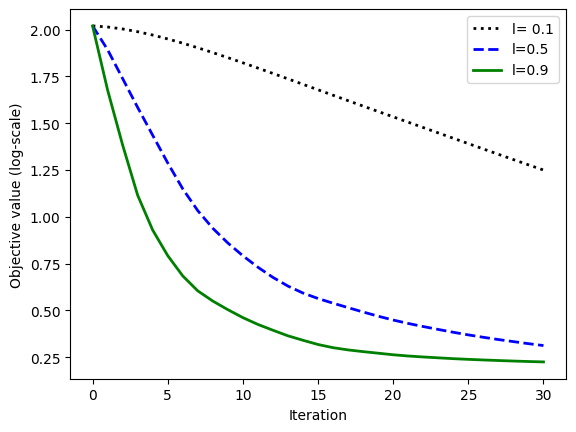

In [ ]:
import matplotlib.pyplot as plt


plt.plot(range(len(M2_2.obj)), np.log(M2_2.obj),  color='black', markersize=2, linewidth =2, linestyle=':',label='l= 0.1')

plt.plot(range(len(M2_1.obj)), np.log(M2_1.obj),  color='blue', markersize=2, linewidth =2, linestyle='--',label='l=0.5')
plt.plot(range(len(M2_M.obj)), np.log(M2_M.obj),  color='green', markersize=2, linewidth =2, linestyle='-',label='l=0.9')


plt.xlabel('Iteration')
plt.ylabel('Objective value (log-scale)')


plt.legend()


Running M2 with h1=10, h2=1
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
h1=10, h2=1: Test Accuracy = 0.3782, Train Accuracy = 0.3893

Running M2 with h1=10, h2=5
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
h1=10, h2=5: Test Accuracy = 0.5980, Train Accuracy = 0.6023

Running M2 with h1=10, h2=10
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
h1=10, h2=10: Test Accuracy = 0.6484, Train Accuracy = 0.6537

Running M2 with h1=20, h2=1
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
h1=20, h2=1: Test Accuracy = 0.5754, Train Accuracy = 0.5805

Running M2 with h1=20, h2=5
L 1.0771584594599872
mu 0.018485104270222305
nu 1.8071570586869743
c 0.966594513337503
al 10
h1=20, h2=5: Test Accuracy = 0.6586, Train Accuracy = 0.6633

Running M2 with h1=20, h2=10
L 1.0771584594599872
mu 0.018485104270222305
nu 1.807

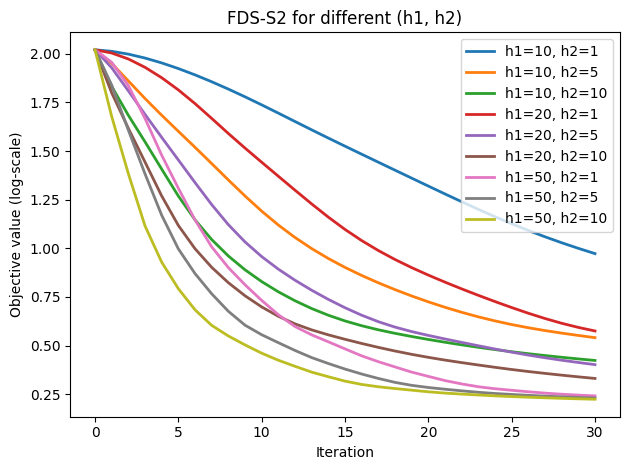

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction
import time


# Set of (p, q) values to compare
h1_values = [10, 20,50]
h2_values = [1,5,10]



# Store models and results
models5 = []


for h1 in h1_values:
    for h2 in h2_values:
        label = f"h1={h1}, h2={h2}"  # You were using `label` without defining it
        color = None  # Assign colours manually if needed (e.g., using itertools.cycle)
        print(f"\nRunning M2 with h1={h1}, h2={h2}")

        model5 = M2(W0.copy(), l=0.9, p=1/3, q=-2/3, h1=h1, h2=h2, maxIter=30, maxTime=None)
        model5.fit(X_train, y_train)

        test_acc5 = accuracy_score(y_test, model5.predict(X_test))
        train_acc5 = model5.acc_train[-1]

        print(f"{label}: Test Accuracy = {test_acc5:.4f}, Train Accuracy = {train_acc5:.4f}")
        models5.append((model5, label, color))

# Plot all models in one figure
#plt.figure(figsize=(10, 6))
for model5, label, color in models5:
    #time = np.cumsum(model5.Time)
    obj_log = np.log(model5.obj)
    plt.plot(range(len(model5.obj)), obj_log, color=color, linewidth=2, linestyle='-', label=label)

plt.xlabel('Iteration')
plt.ylabel('Objective value (log-scale)')
plt.title('FDS-S2 for different (h1, h2)')
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.show()







Running M2 with h1=50, h2=30
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
h1=50, h2=30: Test Accuracy = 0.7500, Train Accuracy = 0.7531

Running M2 with h1=50, h2=40
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
h1=50, h2=40: Test Accuracy = 0.7492, Train Accuracy = 0.7530

Running M2 with h1=50, h2=50
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
h1=50, h2=50: Test Accuracy = 0.7476, Train Accuracy = 0.7509

Running M2 with h1=100, h2=30
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
h1=100, h2=30: Test Accuracy = 0.7464, Train Accuracy = 0.7525

Running M2 with h1=100, h2=40
L 1.0771584594599872
mu 0.018485104270222305
nu 0.18254111703908832
c 0.9966257084179296
al 1
h1=100, h2=40: Test Accuracy = 0.7510, Train Accuracy = 0.7549

Running M2 with h1=100, h2=50
L 1.0771584594599872
mu 0.018485104

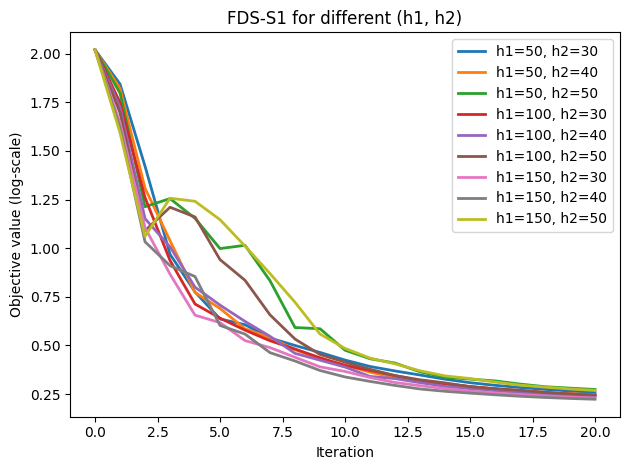

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction
import time


# Set of (p, q) values to compare
h1_values = [50,100,150]
h2_values = [30,40,50]




# Store models and results
models5 = []


for h1 in h1_values:
    for h2 in h2_values:
        label = f"h1={h1}, h2={h2}"  # You were using `label` without defining it
        color = None  # Assign colours manually if needed (e.g., using itertools.cycle)
        print(f"\nRunning M2 with h1={h1}, h2={h2}")

        model5 = M2_0(W0.copy(), l=0.01, p=1/3, q=-2/3, h1=h1, h2=h2, maxIter=20, maxTime=None)
        model5.fit(X_train, y_train)

        test_acc5 = accuracy_score(y_test, model5.predict(X_test))
        train_acc5 = model5.acc_train[-1]

        print(f"{label}: Test Accuracy = {test_acc5:.4f}, Train Accuracy = {train_acc5:.4f}")
        models5.append((model5, label, color))

# Plot all models in one figure
#plt.figure(figsize=(10, 6))
for model5, label, color in models5:
    obj_log = np.log(model5.obj)
    plt.plot(range(len(model5.obj)), obj_log, color=color, linewidth=2, linestyle='-', label=label)

plt.xlabel('Iteration')
plt.ylabel('Objective value (log-scale)')
plt.title('FDS-S1 for different (h1, h2)')
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.show()




